In [1]:
from bw_temporalis import easy_timedelta_distribution, easy_datetime_distribution, TemporalisLCA, Timeline, TemporalDistribution
#pip install dynamic_characterization
from dynamic_characterization.ipcc_ar6.radiative_forcing import characterize_co2, characterize_ch4, characterize_n2o, characterize_co2_uptake

import bw2data as bd
import bw2calc as bc
import bw_graph_tools as graph
import numpy as np
import pandas as pd

In [2]:
bd.projects.set_current("dynamic_characterization project")

In [3]:
bd.Database('AGWP_CO2').write({
    ('AGWP_CO2', "CO2"): {
        "type": "emission",
        "name": "carbon dioxide",
        "temporalis code": "co2",
    },
    ('AGWP_CO2', 'CF'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('AGWP_CO2', 'CO2'),
                'type': 'biosphere'
            },
        ],
        'name': 'CF',
        'type': 'process'
    }
})


07:07:22 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


07:07:22 [info     ] Vacuuming database            


In [4]:
bd.Method(("GWP", "CF_CO2")).write([
    (('AGWP_CO2', "CO2"), 1)
])

In [5]:
lca = bc.LCA({('AGWP_CO2', 'CF'): 1}, ("GWP", "CF_CO2"))   #FU can be more than 1 thing !
lca.lci()
lca.lcia()

In [6]:
lca = TemporalisLCA(lca)

Starting graph traversal
Calculation count: 0


In [7]:
tl = lca.build_timeline()

In [8]:
tl.build_dataframe()
#shows inventory results

,date,amount,flow,activity
0,2024-11-15 06:07:25,1.0,1,2


In [11]:
bd.get_node(id=1)

'carbon dioxide' (None, None, None)

<Axes: xlabel='date', ylabel='amount'>

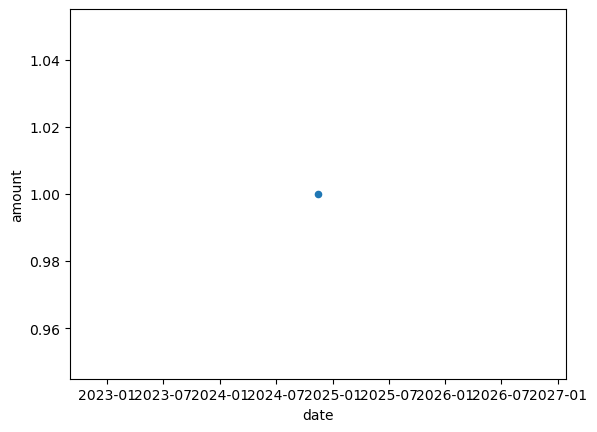

In [12]:
tl.df.plot(x="date", y="amount", kind="scatter")
#dynamic LCI

In [16]:
#Characterisation
characterized_df_co2 = tl.characterize_dataframe?

Signature:
tl.characterize_dataframe(
    characterization_function: Callable,
    flow: set[int] | None = None,
    activity: set[int] | None = None,
    cumsum: bool | None = True,
) -> pandas.core.frame.DataFrame
Docstring:
Applies a characterization function to a Timeline Pandas DataFrame.

The characterization function is expected to take a row from the input Timeline of the form

| date | amount | flow | activity |
|-------|-------|------|----------|
| 101   | 33    | 1    | 2        |
| 312   | 21    | 4    | 2        |

and transform it for a given time period. The output for a very simple function could look like:

| date | amount | flow | activity |
|------|--------|------|----------|
| 101  | 33     | 1    | 2        |
| 102  | 31     | 1    | 2        |
| 103  | 31     | 1    | 2        |
| 312  | 21     | 4    | 2        |
| 313  | 20     | 4    | 2        |
| 314  | 19     | 4    | 2        |

Each row of the input Timeline corresponds to a single day (`date`) and the ass

In [23]:
characterized_df_co2 = tl.characterize_dataframe(
    characterization_function=characterize_co2, 
    flow={1}
)

TypeError: cannot concatenate object of type '<class 'dynamic_characterization.classes.CharacterizedRow'>'; only Series and DataFrame objs are valid

In [15]:
characterized_df_co2.plot(x="date", y="amount", kind="scatter")

NameError: name 'characterized_df_co2' is not defined

In [24]:
characterized_df_co2.plot(x="date", y="amount_sum", kind="scatter")

NameError: name 'characterized_df_co2' is not defined

In [25]:
characterized_df_co2.amount_sum

NameError: name 'characterized_df_co2' is not defined

In [26]:
print('AGWP99 =', characterized_df_co2.amount_sum[99])

NameError: name 'characterized_df_co2' is not defined